In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
import pickle

from sarthak_eda import resample

In [20]:
_,df=resample("D")

df.fillna(df.mean(),inplace=True)

df.set_index('date',inplace=True)
count_df=round((df.shape[0]*0.8)+3)
train_df=df['pm2_5'].iloc[:count_df]

#df_work['pm2_5'].iloc[:split_point]

print(train_df.tail())

#save model
final_model = SARIMAX(train_df, order=(3, 0, 0), seasonal_order=(0, 1, 1, 12))
final_model_fit = final_model.fit()
with open('final_sarimax_model.pkl', 'wb') as file:
    pickle.dump(final_model_fit, file)

c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:87: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.resample('D').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\Desktop\DSCI590Streamlit\sarthak_eda.py:96: FutureWarning: The provided callable <function mean at 0x0000020EFFCCB010> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nums=df_nums.groupby(by='date').agg({'pm10':np.mean,'nh3':np.mean,
c:\Users\samoc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\samoc

date
2022-08-18     45.106250
2022-08-19     41.465000
2022-08-20    181.294167
2022-08-21     79.108750
2022-08-22     68.063333
Name: pm2_5, dtype: float64


2022-08-23    89.236434
2022-08-24    85.266602
2022-08-25    73.491513
2022-08-26    69.089427
2022-08-27    66.971172
2022-08-28    63.107253
2022-08-29    58.957581
2022-08-30    55.567265
2022-08-31    52.498867
2022-09-01    49.463167
2022-09-02    46.571639
2022-09-03    43.886946
2022-09-04    41.364668
2022-09-05    38.976880
2022-09-06    36.725090
2022-09-07    34.606281
2022-09-08    32.610148
2022-09-09    30.728357
2022-09-10    28.955057
2022-09-11    27.284312
Freq: D, Name: predicted_mean, dtype: float64


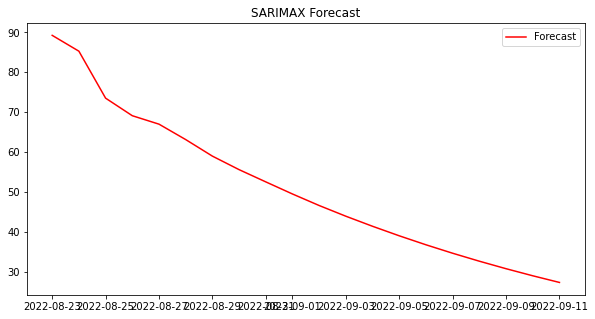

In [19]:
forecast = final_model_fit.get_forecast(steps=20)

forecast_mean = forecast.predicted_mean
print(forecast_mean)
plt.figure(figsize=(10, 5))

plt.plot(forecast_mean, label='Forecast', color='red')

plt.title('SARIMAX Forecast')
plt.legend()
plt.show()